Import necessary libraries and inspect data.

In [157]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [158]:
# Load the dataset
df = pd.read_csv('Dataset_3.csv')

In [159]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the columns of the dataset
print("\nColumns of the dataset:")
print(df.columns)

First few rows of the dataset:
   Unnamed: 0     area  perimeter  physiological_length  physiological_width  \
0           0  65025.0     1020.0                   256                  256   
1           1  65025.0     1020.0                   256                  256   
2           2  65025.0     1020.0                   256                  256   
3           3  65025.0     1020.0                   256                  256   
4           4  65025.0     1020.0                   256                  256   

   aspect_ratio  rectangularity  circularity  major_axis  minor_axis  ...  \
0           1.0        0.992203     0.785398         256         256  ...   
1           1.0        0.992203     0.785398         256         256  ...   
2           1.0        0.992203     0.785398         256         256  ...   
3           1.0        0.992203     0.785398         256         256  ...   
4           1.0        0.992203     0.785398         256         256  ...   

      mean_g     mean_b  

In [160]:
# Print unique categories in the 'classlabel' column
unique_categories = df['classlabel'].unique()
print("Unique categories in the 'classlabel' column:")
for category in unique_categories:
    print(category)

Unique categories in the 'classlabel' column:
Bacterial_spot
Late_Blight
Septoria
Spider_mite
yellow_leaf_curl


In [161]:
# Check for missing values in the dataset
missing_values_count = df.isnull().sum()
print("Missing Values:")
print(missing_values_count)

Missing Values:
Unnamed: 0                    0
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [162]:
import numpy as np
# Replace "0" values with NaN
df.replace(0, np.nan, inplace=True)

# Check for missing values after replacing "0" with NaN
missing_values_count = df.isnull().sum()
print("Missing Values Count after replacing '0' with NaN:")
print(missing_values_count)

Missing Values Count after replacing '0' with NaN:
Unnamed: 0                      1
area                            0
perimeter                       0
physiological_length            0
physiological_width             0
aspect_ratio                    0
rectangularity                  0
circularity                     0
major_axis                      0
minor_axis                      0
convex_area                     0
convex_ratio                    0
mean_r                        408
mean_g                        408
mean_b                        408
stddev_r                      408
stddev_g                      408
stddev_b                      408
contrast                      408
correlation                     0
inverse_difference_moments      0
entropy                       408
classlabel                      0
dtype: int64


So there were 0's hiding in the dataset, that didn't pop up as NaN or missing values, so now we must impute them.

In [163]:
# Impute missing values in numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Check again for missing values after imputation
print("Missing Values Count after Imputation:")
print(df.isnull().sum())

Missing Values Count after Imputation:
Unnamed: 0                    0
area                          0
perimeter                     0
physiological_length          0
physiological_width           0
aspect_ratio                  0
rectangularity                0
circularity                   0
major_axis                    0
minor_axis                    0
convex_area                   0
convex_ratio                  0
mean_r                        0
mean_g                        0
mean_b                        0
stddev_r                      0
stddev_g                      0
stddev_b                      0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
classlabel                    0
dtype: int64


In [164]:
# Specify the file path where you want to save the CSV file
output_file_path = 'imputed_dataset.csv'

# Write the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print("DataFrame has been saved to:", output_file_path)

DataFrame has been saved to: imputed_dataset.csv


We then look for any outliers:

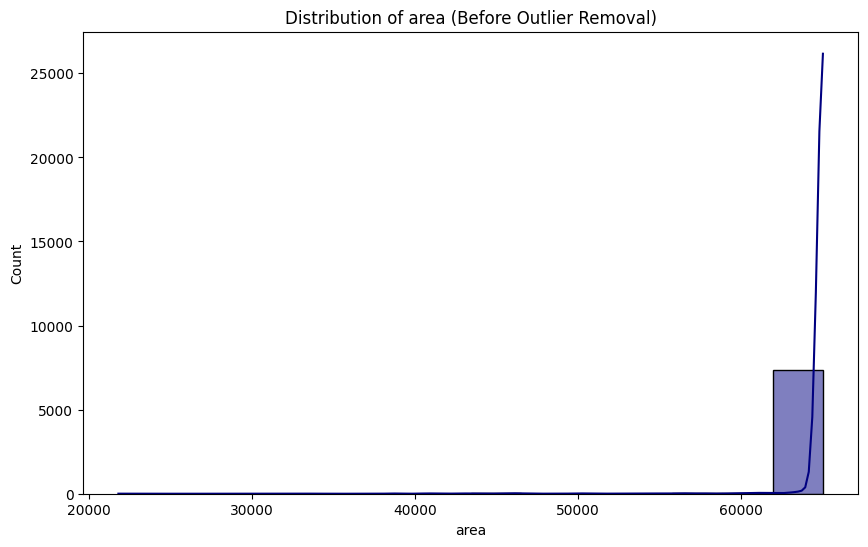

In [165]:
# Select a numerical feature for visualization (e.g., 'area')
feature = 'area'

# Plot the feature before outlier removal
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x=feature, kde=True, color='navy', ax=ax)
ax.set_title(f'Distribution of {feature} (Before Outlier Removal)')
plt.show()

In [166]:
# Select numerical columns
numerical_cols = ['area', 'perimeter', 'aspect_ratio', 'rectangularity', 'circularity', 'major_axis', 'minor_axis', 'convex_area', 'convex_ratio', 'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 'contrast', 'correlation', 'inverse_difference_moments', 'entropy']

# Create a copy of the dataframe to avoid modifying the original
df_clean = df.copy()

# Instantiate the RobustScaler
scaler = RobustScaler()

# Fit and transform the numerical columns
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Calculate the median and quantiles for each numerical feature
quartile_1, quartile_3 = df_clean[numerical_cols].quantile(0.25), df_clean[numerical_cols].quantile(0.75)
iqr = quartile_3 - quartile_1

# Define the outlier range
lower_bound = quartile_1 - (1.5 * iqr)
upper_bound = quartile_3 + (1.5 * iqr)

# Identify and remove outliers
for col in numerical_cols:
    outlier_mask = (df_clean[col] < lower_bound[col]) | (df_clean[col] > upper_bound[col])
    df_clean = df_clean.loc[~outlier_mask, :]

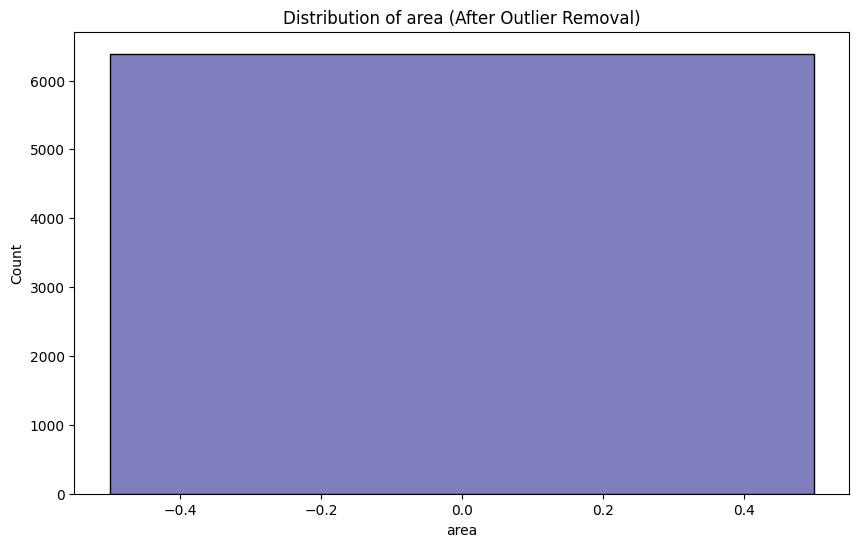

In [167]:
# Plot the feature after outlier removal
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df_clean, x=feature, kde=True, color='navy', ax=ax)
ax.set_title(f'Distribution of {feature} (After Outlier Removal)')
plt.show()

In [168]:
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

Original dataset shape: (7499, 23)
Cleaned dataset shape: (6389, 23)


The distribution appears more concentrated and symmetric around the central values, it now follows a more normal-like shape, with the majority of data points clustered within a narrower range of 'area' values.

Now that we don't have any missing data to impute, and we've dealt with outliers. We begin to prepare the data with one hot encoding the "classlabel" column, and look at correlations between the features so that we can do some feature extraction later.

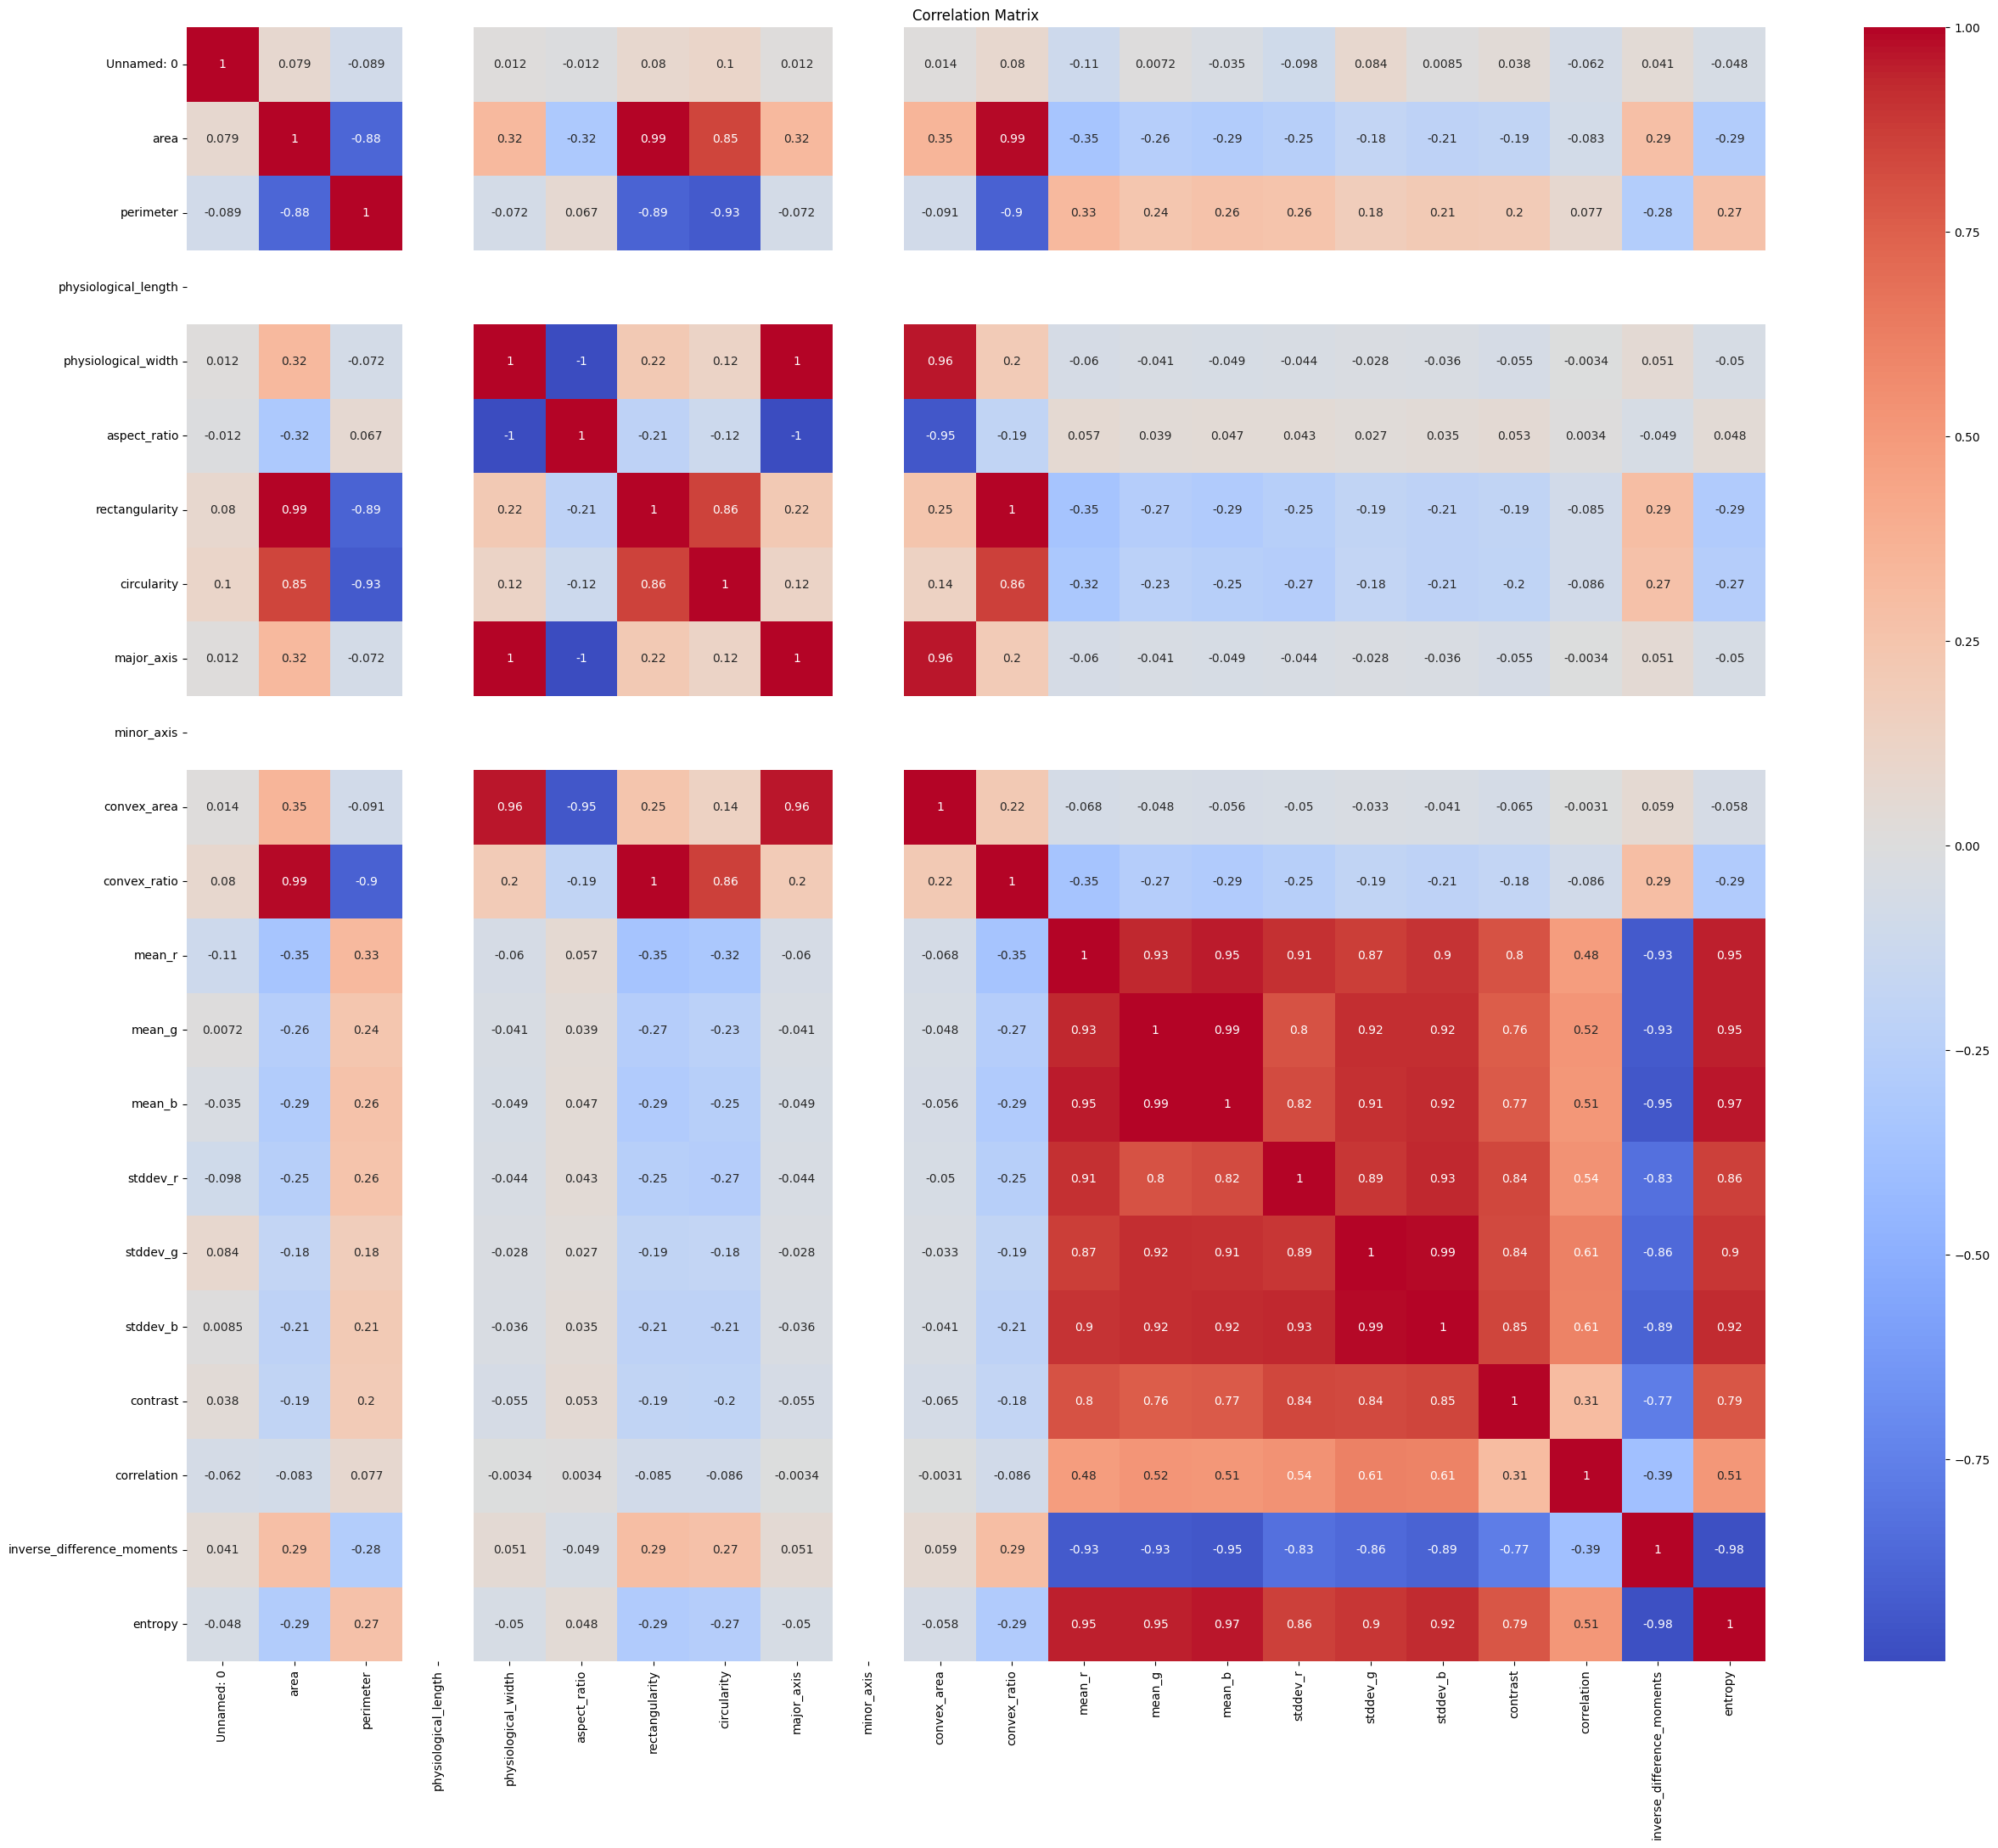

In [169]:
cm = df.drop('classlabel', axis =1)

# Correlation Analysis
corr_matrix = cm.corr()

# Plot correlation matrix
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [170]:
# Identify highly correlated features
highly_correlated_features = []
threshold = 0.9  # Adjust the threshold as needed
for i, row in corr_matrix.iterrows():
    for j in row.index:
        if i != j and abs(row[j]) > threshold:
            feature_pair = sorted([i, j])
            highly_correlated_features.append(feature_pair)

print(f"Highly correlated features (threshold={threshold}):")
print(highly_correlated_features)

Highly correlated features (threshold=0.9):
[['area', 'rectangularity'], ['area', 'convex_ratio'], ['circularity', 'perimeter'], ['aspect_ratio', 'physiological_width'], ['major_axis', 'physiological_width'], ['convex_area', 'physiological_width'], ['aspect_ratio', 'physiological_width'], ['aspect_ratio', 'major_axis'], ['aspect_ratio', 'convex_area'], ['area', 'rectangularity'], ['convex_ratio', 'rectangularity'], ['circularity', 'perimeter'], ['major_axis', 'physiological_width'], ['aspect_ratio', 'major_axis'], ['convex_area', 'major_axis'], ['convex_area', 'physiological_width'], ['aspect_ratio', 'convex_area'], ['convex_area', 'major_axis'], ['area', 'convex_ratio'], ['convex_ratio', 'rectangularity'], ['mean_g', 'mean_r'], ['mean_b', 'mean_r'], ['mean_r', 'stddev_r'], ['mean_r', 'stddev_b'], ['inverse_difference_moments', 'mean_r'], ['entropy', 'mean_r'], ['mean_g', 'mean_r'], ['mean_b', 'mean_g'], ['mean_g', 'stddev_g'], ['mean_g', 'stddev_b'], ['inverse_difference_moments', 'me

So we can see that with a correlation threshold of 0.9, this data would cause problems in the model, with so many columns being closely related. So lets reduce this dimensionality with PCA. Scale up the numerical values as well. Then see what are the best performing features to put in the classifier.

Note: I may have to rearrange the x and y and then do the one hot encoding

In [171]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [172]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(['classlabel', 'Unnamed: 0'], axis=1)
y = df['classlabel']

# Applying one-hot encoding to the categorical target variable
y_encoded = pd.get_dummies(y)

In [173]:
# Scale the features in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [174]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Number of principal components to retain
n_components = sum(explained_variance_ratio < 0.95) + 1
print(f"Number of principal components to retain: {n_components}")

Number of principal components to retain: 5


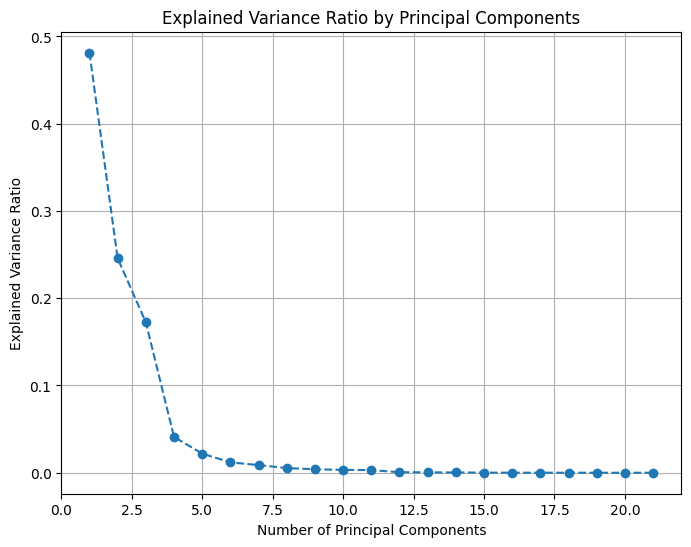

In [175]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

In [176]:
from sklearn.feature_selection import mutual_info_classif

# Reduced dataset with principal components
X_reduced = X_pca[:, :n_components]

# Feature Selection
# Using mutual information for classification
mutual_info = mutual_info_classif(X_scaled, y)

# Sort features by mutual information scores
feature_scores = pd.Series(mutual_info, index=X.columns)
feature_scores = feature_scores.sort_values(ascending=False)

# Print the top features
print("\nTop Features:")
print(feature_scores.head(20))


Top Features:
correlation                   0.189742
stddev_r                      0.136969
stddev_b                      0.136722
stddev_g                      0.133010
mean_g                        0.122165
mean_b                        0.121636
mean_r                        0.121388
contrast                      0.107888
entropy                       0.099466
inverse_difference_moments    0.091418
convex_ratio                  0.032640
rectangularity                0.025682
area                          0.023862
perimeter                     0.023841
circularity                   0.017845
minor_axis                    0.003576
major_axis                    0.003402
aspect_ratio                  0.002867
convex_area                   0.000000
physiological_width           0.000000
dtype: float64


Now after using PCA and scaling, we see what the top features are, so our plan would be to only use top performing features, ie > 0.1 in out classifiers

In [177]:
# Select features with mutual information scores > 0.1
selected_features = feature_scores[feature_scores > 0.1].index.tolist()

# Get the integer indices of selected features
selected_indices = [X.columns.get_loc(feature) for feature in selected_features]

# Filter X_scaled to include only selected features
X_selected = X_scaled[:, selected_indices]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Print the shape of training and test sets
print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Test set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (5999, 8)  y: (5999, 5)
Test set shape - X: (1500, 8)  y: (1500, 5)


Great, now that we have our training and test data prepped, we can throw it into the models and observe the performance via the accuracy, performance, recall and F1 score metrics.

In [178]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rfc = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
precision_rfc = precision_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
recall_rfc = recall_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
f1_rfc = f1_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Print metrics
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=y_encoded.columns))

Accuracy: 0.6046666666666667
Precision: 0.6990201504141434
Recall: 0.6046666666666667
F1 Score: 0.6187006613583947
Classification Report:
                  precision    recall  f1-score   support

  Bacterial_spot       0.37      0.78      0.50       310
     Late_Blight       0.86      0.63      0.72       313
        Septoria       0.73      0.39      0.51       293
     Spider_mite       0.75      0.59      0.66       281
yellow_leaf_curl       0.80      0.62      0.70       303

        accuracy                           0.60      1500
       macro avg       0.70      0.60      0.62      1500
    weighted avg       0.70      0.60      0.62      1500



In [179]:
# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1))
precision_knn = precision_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
recall_knn = recall_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')
f1_knn = f1_score(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), average='weighted')

# Print metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test.values.argmax(axis=1), y_pred_knn.argmax(axis=1), target_names=y_encoded.columns))

K-Nearest Neighbors Metrics:
Accuracy: 0.572
Precision: 0.6209761430641457
Recall: 0.572
F1 Score: 0.5794779019812046

Classification Report for Logistic Regression:
                  precision    recall  f1-score   support

  Bacterial_spot       0.39      0.70      0.50       310
     Late_Blight       0.85      0.61      0.71       313
        Septoria       0.54      0.38      0.44       293
     Spider_mite       0.61      0.54      0.57       281
yellow_leaf_curl       0.71      0.62      0.66       303

        accuracy                           0.57      1500
       macro avg       0.62      0.57      0.58      1500
    weighted avg       0.62      0.57      0.58      1500



In [180]:

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting the class labels for the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1))
precision_dt = precision_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
recall_dt = recall_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')
f1_dt = f1_score(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), average='weighted')

# Print metrics for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Detailed classification report for Logistic Regression
print("\nClassification Report for Decision Tree:")
print(calssification_report(y_test.values.argmax(axis=1), y_pred_dt.argmax(axis=1), target_names=y_encoded.columns))

Decision Tree Metrics:
Accuracy: 0.556
Precision: 0.5622968701526253
Recall: 0.556
F1 Score: 0.558122868481824

Classification Report for Decision Tree:


NameError: name 'calssification_report' is not defined